# The Grabow Group Handbook
Authors: Hari Thirumalai, Juan Manuel Arce-Ramos and Karun Kumar Rao

## Introduction

The aim of this document is to help users who are new to the concepts and tools used in the group. By the end of this tutorial, the reader will should have a basic understanding of the various components of typical computational research workflows, starting from basic Linux commands to running calculations using VASP and other softwares. This document was not designed to be a thorough guide and the user is encourage to complement the information provided here with extensive Google searches.

We also recommend you to look at John Kitchin's DFT Book [pdf](http://kitchingroup.cheme.cmu.edu/dft-book/dft.pdf) or [html](http://kitchingroup.cheme.cmu.edu/dft-book/dft.html) versions since it contains many working examples that touch upon practical concepts of computational catalysis which can be easily (or relatively easy) followed and implemented.

## High Performance Computing
A significant portion of the research conducted in the group pertains to computational modeling in which various properties of interest for a system are calculated by means of /ab initio/ density functional theory calculations. We refer the reader to an excellent [book](https://www.wiley.com/en-us/Density+Functional+Theory%3A+A+Practical+Introduction-p-9780470373170) that delves on the nuts and bolts of DFT by David Sholl. These calculations are computationally intensive and are exclusively performed on computing clusters or supercomputers. These massively-parallel machines are accessed remotely through the [Secure Shell Protocol](https://www.ssh.com/ssh/protocol) and the user is able to access his or her account on that machine. Once logged in, the user sets up these jobs and submits them to the system's resource manager, or the queue. Once resources become available, the queue executes the job and the user is notified upon completion of the job.

### Queues
The queue is a utility that accepts job submissions from users, implements a fair use policy, and allocates resources based on job requirements and other parameters. Most of the systems used by our group are managed by the [SLURM](http://slurm.schedmd.com/) Workload Manager=. Maxwell is managed by the [Torque Resource Manager](http://www.adaptivecomputing.com/products/open-source/torque/). The configuration keywords and parameters are different for different systems and every job submission script must contain these parameters for it to be accepted by the queue. The queue keywords are

For =SLURM=
```
#SBATCH -p <queue partition>
#SBATCH -o myMPI.o%j
#SBATCH -N <number of nodes> -n <number of processors per node>
#SBATCH -t <walltime in hhh:mm:ss>
#SBATCH --mail-type=END
#SBATCH --mail-user=<user email id>
```

For =Torque=
```
#PBS -e myMPI.e%j
#PBS -o myMPI.o%j
#PBS -m ae
#PBS -M <user email id>	
#PBS -l <walltime in hhh:mm:ss>
#PBS -r n
#PBS -l nodes=<number of nodes>:ppn=<number of processors per node>
#PBS -l pmem=<Memory requested per node in mb>
#PBS -S /bin/tcsh <Specify type of Shell>
```

A more detailed explanation of these parameters follows:
- queue partition: This specifies the partition to which you want to submit your job.
- number of nodes: A node is a group of processors, which are designed to work together with maximum efficiency. A simple example of a node would be a computer with an Intel i5 processor, where the single node has 4 processors. 
- number of processors: This is the number of processors or threads in a node. Usually, the user is expected to request all processors in a node. This parameter is system configuration dependent.
- walltime in hours: This specifies the time until which the job will execute on the system. Once runtime exceeds this value, the job execution is terminated. 

### Jobscripts
Jobscripts are executable files of a defined environment which consist of executable code. Jobscripts can be in a variety of file formats and the most commonly used ones are python, shell and cshell jobscripts.
A jobscript and a simple file are differentiated by the file type identifier. This line tells the compiler, interpreter and any text-editor the type of the file. This removes the need for an extension to the file, which can also serve as an identifier. A properly identified file also enables source code formatting on text-editors.

Example job scripts for SLURM and PBS (toruque) schedulers are given below

```
#!/usr/bin/env python --> File environment identifier

#SBATCH -p batch
#SBATCH -o myMPI.o%j
#SBATCH -N 5 -n 100                            [SLURM Parameters]
#SBATCH -t 168:00:00
#SBATCH --mail-type=END
#SBATCH --mail-user=hthirumalai@gmail.com

# Your executable python code begins here
from ase.io import read
from ase.calculators.vasp import Vasp

...
```
and
```
#!/usr/bin/env python

#PBS -e stderr
#PBS -o stdout
#PBS -m ae
#PBS -M hthirumalai@gmail.com
#PBS -l walltime=100:00:00
#PBS -r n                                        [PBS Parameters]
#PBS -l nodes=1:ppn=12
#PBS -l pmem=2500mb
#PBS -S /bin/tcsh
#PBS -V

from ase import *
from ase.calculators.vasp import Vasp

...
```

```
#!/bin/sh --> File environment identifier

#SBATCH -p batch
#SBATCH -o myMPI.o%j
#SBATCH -N 5 -n 100                            [SLURM Parameters]
#SBATCH -t 168:00:00
#SBATCH --mail-type=END
#SBATCH --mail-user=hthirumalai@gmail.com

# Your executable shell script begins here
echo 'VASP starting execution ..'

...
```
and
```
#!/bin/sh

#PBS -e stderr
#PBS -o stdout
#PBS -m ae
#PBS -M mayerzmytm@gmail.com
#PBS -l walltime=100:00:00
#PBS -r n                                        [PBS Parameters]
#PBS -l nodes=1:ppn=12
#PBS -l pmem=2500mb
#PBS -S /bin/tcsh
#PBS -V

# Your executable shell script begins here
echo 'VASP starting execution ..'
```

### System Specific Settings
Our group has access to various clusters at any given time and job scripts must be modified such that they execute without errors when transferred from one cluster to another. This section consists of all cluster relevant information. All storage-intensive jobs must be executed on the group's project directories. These locations are backed-up on a daily basis. $SCRATCH directories on Cori and Stampede2 are short term, high I/O performance storage that are periodically purged. Therefore, the reader is advised to use these directories for running jobs only and transfer these files to permanent storage on the University of Houston clusters.

Opuntia
```
project directory: /project/grabow

#SBATCH -p grabow
#SBATCH -o myMPI.o%j   
#SBATCH -N 1 -n 20
#SBATCH -t 24:00:00
#SBATCH --mail-type=END
#SBATCH --mail-user=@gmail.com
```

uHPC
```
project directory: /uhpc/grabow

#SBATCH -p batch
#SBATCH -o myMPI.o%j   
#SBATCH -N 1 -n 20
#SBATCH -t 24:00:00
#SBATCH --mail-type=END
#SBATCH --mail-user=@gmail.com  

```

Juniper
```
project directory: /project/grabow

#SBATCH -p batch
#SBATCH -o myMPI.o%j   
#SBATCH -N 1 -n 24
#SBATCH -t 24:00:00
#SBATCH --mail-type=END
#SBATCH --mail-user=@gmail.com 
```

Sabine
```
project directory: /brazos/grabow

#SBATCH -p batch
#SBATCH -o myMPI.o%j   
#SBATCH -N 1 -n 24
#SBATCH -t 24:00:00
#SBATCH --mail-type=END
#SBATCH --mail-user=@gmail.com  
```

Cori
```
scratch directory: $SCRATCH
project directory: /global/project/projectdirs/m2029/

#SBATCH -p regular
#SBATCH -C knl
#SBATCH -A m2029
#SBATCH -o myMPI.o%j   
#SBATCH -N 1 -n 64
#SBATCH -t 24:00:00
#SBATCH --mail-type=END
#SBATCH --mail-user=@gmail.com  
```
AND
```
#SBATCH -p regular
#SBATCH -C haswell
#SBATCH -A m2029
#SBATCH -o myMPI.o%j   
#SBATCH -N 1 -n 32
#SBATCH -t 24:00:00
#SBATCH --mail-type=END
#SBATCH --mail-user=@gmail.com  

```

Stampede2
```
scratch directory: $SCRATCH
project directory: $WORK

#SBATCH -p normal
#SBATCH -o myMPI.o%j   
#SBATCH -N 1 -n 64
#SBATCH -t 24:00:00
#SBATCH --mail-type=END
#SBATCH --mail-user=@gmail.com  
```
AND
```
#SBATCH -p skx-normal
#SBATCH -o myMPI.o%j   
#SBATCH -N 1 -n 48
#SBATCH -t 24:00:00
#SBATCH --mail-type=END
#SBATCH --mail-user=@gmail.com  
```

### Terminals
The terminal is the application that allows the user to interact with the computer through the command line. Any output from code can also be piped out to the command line on the terminal.

A Windows user needs to download software that provides a terminal for remote ssh access and Linux and Mac OS users can use the pre-installed terminal on their computer. The figure that follows shows a typical terminal window on a Mac OS computer. Users can access the terminals by searching for =Terminal= in Apple's Spotlight Search (command+space).

![Terminal window on Mac OS](figures/terminal-mac.png)

If you are a Linux user then you should be able to start a terminal without the need for any installation. Terminal on a Linux system running Ubuntu can be accessed using Ctrl+Alt+T. Multiple tabs can be opened by hitting Ctrl+Shift+T.

![Terminal window on Linux](figures/Ubuntu-terminal.png)

Windows users can install either [MobaXTerm](http://mobaxterm.mobatek.net/) or [Xming](http://www.straightrunning.com/XmingNotes/). We recommend MobaXTerm.

![MobaXTerm Terminal window on Windows](figures/moba.png)

### Logging into clusters/supercomputers

In order to login into your account in a cluster or supercomputer you need the address of the remote machine and have an account in it. One should be able to connect to the remote computer typing the following command in a terminal

```
ssh -X user_name@supercomputer_address
```

Addresses of the supercomputers used by the group are

```
System: colossus
Address: colossus.egr.uh.edu

System: opuntia
Address: opuntia.cacds.uh.edu

System: maxwell 
Address: cusco.hpcc.uh.edu

System: cori
Address: cori.nersc.gov

System: stampede2
Address: stampede2.tacc.utexas.edu

System: uhpc
Address: uhpc.hpcc.uh.edu

System: juniper
Address: juniper.hpcc.uh.edu

System: sabine
Address: sabine.cacds.uh.edu

```
The environment has to be set up the first time the user logs in to load all the programs, modules and executables required for efficient operation. This is addressed in the final section of this chapter. 

### Configuration of a .cshrc file
When the user logs in to a remote machine, there are certain default parameters and applications that will be enabled when you enter the terminal. The most common types of shell environments used are *BASH* shells and *CSH/TCSH* shells. These environments will have a *.(shell)rc* file associated with it. In almost all situations, a user must modify the list of programs, defaults and executables in order to suit his or her needs. This information is stored in the *.(shell)rc* file in your system. For the clusters on campus, the defaults are setup with *CSH* shells. This file is loaded and executed every time you log in into the machine, and can be modified according to your needs.

The *.cshrc* can be accessed through the *vi* editor by executing the command

```
vi .cshrc```

This file is unique to the user and contains syntax that configures your personal profile in the cluster/supercomputer. We do not expect you know learn these concepts off the bat, but you are ultimately expected to understand what exactly goes on behind the terminal

A typical *.cshrc* file looks like this:

```
module load vasp
module load ase
module load povray

setenv PATH ~/bin:/home/jarceram/apps:${PATH}

setenv DB ~/Dropbox/Post-Doc/workbooks_jmax/databases/

if ! $?PYTHONPATH then
    setenv PYTHONPATH
endif

setenv PYTHONPATH /share/apps/python2.6-extra/lib/python2.6/site-packages:${PYTHONPATH}

setenv VASPDIR '/share/apps/vasp/5.4.1/bin'
setenv VASP_COMMAND '/share/apps/openmpi-1.10.2-intel/bin/mpirun ${VASPDIR}/${VASP_EXEC}'
setenv VASP_PP_PATH /share/apps/vasp/vasp-potentials
```

The user must ensure that the enviroment variables that link VASP with ASE are pointing to correct and accessible locations. Those environment variables are *VASPDIR*, *VASP_COMMAND* and *VASP_PP_PATH*.

Also, depending on the cluster or supercomputer you are working on, you should be able to set helpful environmental variables by loading modules that were defined by the administrators. This is shown in the first three lines in the example *.cshrc*.

If you have questions about what your *.cshrc*  file should contain, ask somebody in the lab, he/she will be happy to help you.

## Linux

This document was created as a Jupyter Notebook and inherently cannot execute shell commands. Therefore, we recommend that the reader copies these commands onto an actual terminal and execute these commands for the purposes of practise. 
Code must be copied, pasted and executed on the terminal line by line.

### Basic shell commands
These commands will help you navigate through your folders, copy files, remove files and some other basic shell commands will be used in the examples of this section. 

#### Folder creation and navigation
Once in your \$HOME directory (\$HOME is the environmental variable that stores the absolute path to your home directory), create a directory named "example" and navigate into it. **mkdir** (create directory) and **cd** (change directory) are the commands will be used for this exercise.

Creating a new directory
```
mkdir example
cd example
```

Creating a new folder structure
```
mkdir -p topfolder/nextfolder/nextnextfolder
cd topfolder/nextfolder
```

To navigate the folder structure, the ```cd``` command will be used once again
```
cd ..        # Navigate one level above
cd ../../    # Navigate two levels above
```

#### Displaying contents of files and folders
The **echo** command allows the user to print the values stored by environment variables, or in general it can be used as a generic **print** statement. 
```
echo "Hello new member!!!"
echo \$HOME
```

The output from the command line can be *piped* out to an object such as a text file. For example
```
echo "If you're reading this, your life is going to be miserable, muhahahahah" > greetings.txt
```

Then, the **ls** command can be used to list the contents of the directory in which the user is currently in. In my case, there is a load of files that are required for building this tutorial. You can also see the greetings.txt file we just created.

In [3]:
ls

Circulating fluidized bed.mp4* dft_tutorial.tex
README.md                      dft_tutorial.toc
TODO*                          figures/
ZrO2_surface_101_ex.traj*      for-arce.png*
_minted-dft_tutorial/          greetings.txt
ase.png*                       py_ex_data.txt*
dft_tutorial.aux               renamed.dat
dft_tutorial.html*             test/
dft_tutorial.log               test.png*
dft_tutorial.org               tutorial.ipynb
dft_tutorial.out               tutorial.pdf
dft_tutorial.pyg


"greetings.txt" is a text file located in your current directory. If you want to display the content of a typical ASCII text file, you can use commands such as **more**, **less**. The syntax for these commands is given below
```
more <filename>
less <filename>
```
These commands allow the user the "scroll" through the file if its contents exceed one window. Scrolling can be achieved by hitting the space-bar. The commands can be killed by hitting ```q```

Other useful commands for reading files are **head** and **tail**, which display the first 10 lines and the last 10 lines of a file, respectively.
```
head POSCAR               # Displays first 10 lines in file
tail POSCAR               # Displays last 10 lines in file
```
Arguments can be passed to these commands to display more lines than the default number. This is done as follows
```
head -n 71 POSCAR               # Displays first 71 lines in file
tail -n 19 POSCAR               # Displays last 19 lines in file
```

#### Manipulating contents of files and folders
##### Piping and Appending
The previous section showed how terminal output could be piped to a file using the ```>``` symbol. Another way of piping output into a file is

```command > output.txt       # All the output from executing the command is piped into output.txt``` 

This command essentially creates a new file "output.txt" and inserts the text into it. If a file of the same name exists, then all the contents in the file are overwritten.

However, if the user would like to append text to an existing file, then they can use 
``` command >> output.txt"```. Using ```>``` will again erase the original content of the tect file. For example
```
echo "This is the second line" >> hello.txt
```

Reading the contents of ```output.txt``` should give you
```
If you're reading this, your life is going to be miserable, muhahahahah
This is the second line```

##### Copying, Moving and Deleting
These command **cp** and **mv** are among the most commonly used ones in a terminal. They can be interchangably used, but are completely different in operation. Using the file ```output.txt``` as the example, it's contents can be copied to another file ```output-copy.txt``` by executing the command
```
cp output.txt output-copy.txt
```
This will create a new file of name ```output-copy.txt``` if it does not exist. Otherwise, the command will overwrite the existing file for same name with the contents from ```output.txt```. If the user would like to copy folders, the ```recursive``` option must be enabled. The example given below copies the entire folder ```ghi``` from its original location to the destination, and is pasted with the new name ```xyz```.
```
cp -r abc/def/ghi abc/xyz
```

The **mv** command is used in the following way. Execution of the command below
```
mv output.txt output-copy.txt
```
renames ```output.txt``` as ```output-copy.txt```, and does not retain the original file. This command can also be used for moving or renaming folders as is. The idea of directory structure and navigation is the same as before.

Finally, files and folders can be deleted using the command **rm**. Files can be deleted with this command in the same way as **cp**, while deletion of folders require the ```recursive``` option enabled. Examples follow
```
rm test-file
rm -r test-folder
```

#### Text editors
VI and Emacs are commonly used text editors in the world of computing. They are similar to familiar applications like Notepad in windows. Text editors are extremely important because they can open any file the contains ASCII text. These files can be anything from configuration files to scripts. They are lightweight and are extremely versatile.

Both editors are fairly difficult to work with at first and possess a steep learning curve. They are useful for different purposes and it is best to know the basics of both to ensure an efficient use of time. Outside of standard tutorials, we strongly encourage you to look up resources on the internet. It has always happened that we learn something with every new Google search. 

##### VI Editor
VI editor is a very powerful and handy text editor used commonly by members in the group. The best way one can learn this editor is to go through the VIM Tutorial. This can be accessed on any terminal by typing 
```
vimtutor
```
which throws up this welcome screen.
```

=    W e l c o m e   t o   t h e   V I M   T u t o r    -    Version 1.7      =
===============================================================================

     Vim is a very powerful editor that has many commands, too many to
     explain in a tutor such as this.  This tutor is designed to describe
     enough of the commands that you will be able to easily use Vim as
     an all-purpose editor.

     The approximate time required to complete the tutor is 25-30 minutes,
     depending upon how much time is spent with experimentation.

```

##### Emacs
Emacs is again a powerful and versatile text editor, used by some members (Karun and Hari) in the group. Emacs can be accessed by typing ```emacs``` in the terminal. In most systems, the emacs that pops up is one built into the command line, in a manner similar to the VI editor. 

Emacs can be learned by opening it and accessing its tutorial on the main page.

![Emacs Scratch Window](figures/emacs.png)

## Python
### Introduction
Python is a programming language which is used and documented extensively by the scientific communtiy. We use python to interface and understand the Atomic Simulation Environment (ASE) which is used to build, setup and modify molecular models.
The best resources for learning scientific python is through [SciPy](http://www.scipy-lectures.org/) which has extensive notes and examples on using python for scientific computing. [PYCSE](http://kitchingroup.cheme.cmu.edu/pycse/pycse.html) is a module written by [John Kitchin](http://kitchingroup.cheme.cmu.edu/) and has many examples which use standard Python Modules as well as custom modules in PYCSE. We recommend that you practice these examples as much as possible to obtain a good understanding of python and how to use it to suit your needs.

### Getting in the Groove
This section shows some of the more common commands and functions that you will see in python scripts used by some of the group members. Again, we encourage you to review the massive/huge documentation for [python](https://docs.python.org/2/)

On a command line, the python interpreter can be accessed through the command ```python``` assuming that python is installed in it. The following code blocks will be executable if you are using the iPython Notebook. If you are using the read-only html or pdf versions of the tutorial, you can copy the python code onto the interpreter, or onto a script.

#### Print
The simplest and most common bit of code ever created!

In [1]:
print 'Hello, this is a sample sentence!'
print 'This\tis\ttab\tseparated\ttext'

Hello, this is a sample sentence!
This	is	tab	separated	text


#### Arrays and Dictionaries
Arrays and dictionaries are useful data types used to store large amounts of data that can be easily accessed and indexed. They can become fairly complex, but the following code block shows a simple application of these data types. We suggest that the reader builds a working knowledge of these data types, given the data-intensive nature of the work done in the group.

Numpy arrays and lists are interchangeable datatypes that behave differently. Numpy is an immensely powerful python module with built-in functionalitites that take care of most commonly mathematical operations. The type of array that Numpy generates is called an ```numpy.ndarray```.

Dictionaries are data structures that work on the concept of key-value pairs, where the key is used to index the dictionary and extract the value corresponding to the key. Much like 2D and 3D arrays, dictionaries can be nested within themselves to create massive data-structures and databases.

In [3]:
import numpy as np

# Array with a range of numbers from 0 to 5, with step size of 1.
# Here, the end point is not included.
a = np.arange(0, 5, 1)
print a

# Array with 10 numbers between 0 and 1
a = np.linspace(0, 5, 10)
print a

# Dictionary with keys and corresponding values showing date format
b = {'Day': 'DD',
     'Month': 'MM',
     'Year': 'YYYY'}

print b
print b['Month']

[0 1 2 3 4]
[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]
{'Year': 'YYYY', 'Day': 'DD', 'Month': 'MM'}
MM


#### Types of Variables
Here we will define 4 types of variables: string variables, scalar variables (either integer or float numbers), vector or 1-D array and matrix or 2-D array.

In [5]:
string = 'sample text'
scalar = 12
array_1d = [1,3,6,-4,0.95]
array_2d = [[1,2],[-3,2.0]]

print string 
print scalar
print array_1d
print array_2d

sample text
12
[1, 3, 6, -4, 0.95]
[[1, 2], [-3, 2.0]]


### Loading python modules and functions
To use the wonderful functionalities of python modules like ```numpy, scipy, matplotlib, pandas, ase``` in addition to the default modules the user must explicitly import them in the python codes. 

Probably the most common modules that you are going to use are these:

|      Module     |                   Example Functions                  |          Description         |
|:---------------:|:----------------------------------------------------:|:----------------------------:|
|        os       | mkdir, makedirs chdir, getcwd, listdir path, symlink |          System I/O          |
|       ase       |                  Atom, Atoms, build                  |     Create atoms objects     |
|      ase.io     |                      read, write                     | Atoms objects read and write |
| ase.calculators |                     Vasp, NWChem                     |  Setup and run calculations  |
|      shutil     |                      copy, move                      |      High level file I/O     |

Modules are loaded as follows. Module errors show up in the following way.

In [3]:
# import os
import osa #typo
from ase import atoms
from ase.io import read
from ase.calculators.vasp import Vasp

ImportError: No module named osa

### Simple data manipulation 
Data extraction and manipulation is important when dealing with huge data files or when automation is required in order to post-process the data in an efficient way.

As an example, you want to determine the value of the lattice parameter of a bulk structure that minimizes the energy of the system. A simple approach to determine this value is to determine the energy of the system while changing the the lattice constant. Then, the energy and volume for each lattice constant is fit to an equation to obtain the volume that minimizes the energy. From the volume, one can extract the lattice constant given a shape of unit cell.

We will use python to extract data and manipulate them to create a simple plot.
Create a text file using *vi* called py_ex_data.txt and copy all lines. Note that data columns are separated by tabs. 
```
3.8	-12.28653631
3.85	-12.65124072
3.9	-12.88611724
3.95	-13.01158939
4	-13.04446413
4.05	-12.99864981
4.1	-12.88660177
4.15	-12.71939621
4.2	-12.5064955```

Therefore, executing the command

```cat >  py_ex_data.txt << EOF``` gives us 
```
3.8	-12.28653631
3.85	-12.65124072
3.9	-12.88611724
3.95	-13.01158939
4	-13.04446413
4.05	-12.99864981
4.1	-12.88660177
4.15	-12.71939621
4.2	-12.5064955
EOF
```

A simple code to read this file and extract the datapoints could look like the following:

['3.8', '3.85', '3.9', '3.95', '4', '4.05', '4.1', '4.15', '4.2']
['-12.28653631', '-12.65124072', '-12.88611724', '-13.01158939', '-13.04446413', '-12.99864981', '-12.88660177', '-12.71939621', '-12.5064955']


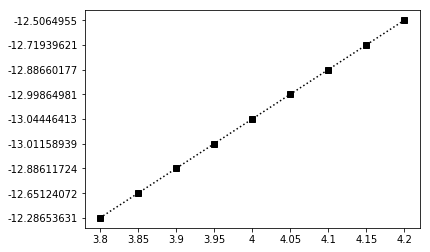

In [5]:
import matplotlib.pyplot as plt

# This is a comment. 
# Reading data file.
data = open('py_ex_data.txt','r')
lines = data.readlines()
a = []
e = []

# To go through all lines we conveniently use a FOR loop
# All data is stored in the empty lists a and e
for line in lines:
  values = line.split()
  a.append(values[0])
  e.append(values[1])

print a
print e
plt.plot(a,e,'s:k')

## Atomic Simulation Environment (ASE)
ASE is an Atomic Simulation Environment written in the Python programming language with the aim of setting up, steering, and analyzing atomistic simulations (adapted from [ASE](https://wiki.fysik.dtu.dk/ase/about.html)). The ASE has been constructed with a number of “design goals” that make it:

- Easy to use:
Setting up an atomistic total energy calculation or molecular dynamics simulation with ASE is simple and straightforward. ASE can be used via a graphical user interface, Command line tools and the Python language. Python scripts are easy to follow (see What is Python? for a short introduction). It is simple for new users to get access to all of the functionality of ASE.

- Flexible:
Since ASE is based on the Python scripting language it is possible to perform very complicated simulation tasks without any code modifications. For example, a sequence of calculations may be performed with the use of simple “for-loop” constructions. There exist ASE modules for performing many standard simulation tasks.

- Customizable:
The Python code in ASE is structured in modules intended for different purposes. There are ase.calculators for calculating energies, forces and stresses, ase.md and ase.optimize modules for controlling the motion of atoms, constraints objects and filters for performing nudged-elastic-band calculations etc. The modularity of the object-oriented code make it simple to contribute new functionality to ASE.

- Pythonic:
It fits nicely into the rest of the Python world with use of the popular NumPy package for numerical work (see Numeric arrays in Python for a short introduction). The use of the Python language allows ASE to be used both interactively as well as in scripts.

### Installing ASE
ASE is a bundle of python modules which can be invoked or loaded when atomic simulations are required to be set up or analyzed. The easiest way of installing ase, is to download the latest source tar ball from the website. Once downloaded, the tar ball must be extracted, and installation can be completed by running 
```
python setup.py install --user
```
Tt is necessary to add the installation path in your *=.cshrc=* file and add ~/.local/bin to the front of your PATH environment variable. This is dependent on the system you are using. Adding this location onto your ```$PATH``` environment variable enables you to access ```ase-gui``` and ```ase-db``` from any location on the system. 

### Reading and Viewing simple atoms files
We have downloaded a standard *cif* file (Crystallographic Information Format) from the International Zeolite Website [IZA](http://www.iza-online.org/) as an example structure. The *cif* file is present as MFI.cif in this folder. 
The ASE module ```ase.io``` has the functions read and write which are capable of handling various formats for atomic structure, and can be used to set up every forseeable future **Vasp** calculation. An example of how to read a *cif* file is shown in the code block below.

Alternately, you can are use the ```ase.build``` class to create simple pre-defined gas-phase molecules. In this example, we will create a $H_2O$ molecule.

In [15]:
# Import the read and write functions from the ase.io module.
from ase.io import read, write

# Import the molecule function from ase.build
from ase.build import molecule

# Import the visualize function to view the imported atoms object.
from ase.visualize import view

# Load the cif file into a pythonic object called 'atoms'.
#atoms = read('MFI.cif')

# Load a water molecule from ase.build
atoms = molecule('H2O')

# View the 'atoms' object.
view(atoms)

**Vasp** calculations require a certain set of input files for calculation initialization. The file that consists of the initial structure and cartesian coordinates of the model under investigation is the **POSCAR**. One can simply read a *cif* and write out a **POSCAR** using the functions provided by the ```ase.io``` module. An example of writing files of various formats is shown below

In [7]:
from ase.io import read, write

atoms = read('MFI.cif')

# Write the cartesian coordinates file in the =vasp= POSCAR format.
# File written in the folder 'images'
write('figures/POSCAR_ZSM-5', atoms)

# Write the cartesian coordinates file in the =xyz= format
write('figures/atoms.xyz', atoms)

### Building gas phase molecules
Smaller models involving gas phase molecules and simple surfaces are usually built up from scratch, using the modules and functions availble in ```ase```. This can either be done through scripting or through the ```ase-gui``` interface. Extensive documentation on using the ```ase-gui``` can be accessed in the ASE [documentation](https://wiki.fysik.dtu.dk/ase/ase/gui/gui.html). Here, we will provide a quick introduction on creating different systems.

The most simple demonstration to begin with would be to model a simple gas phase molecule such as $H_{2}O$. ASE provides a number of ways to build and modify models, and we will explore two ways. 1) using python scripting and 2) using the ASE Graphical user interface ```ase-gui```. We recommend that you use scripting wherever possible as this keeps track of all changes made to the model including the documentation. 

Gas phase models are the simplest models to create and are the least expensive in terms of computational processing requirements. Such systems require that they are enclosed in a vacuum cell of certain dimensions that depends on the dimensions of the model itself. The presence of this cell ensures that when DFT calculations are performed and periodic boundary conditions are implemented in $x$, $y$ and $z$ directions, there is minimal interaction between the neighboring images. Hence, one should perform calculations to ensure that energies and cell sizes are well converged, before proceeding to use data from these calculations.

We will build a simple $H_2O$ molecule in a box of 10 x 10 x 10 $\AA$. 

In [12]:
from ase.build import molecule
from ase.visualize import view
from ase.io import write

atoms = molecule('H2O')
atoms.set_cell([10, 10, 10])
atoms.center()

write('figures/molec_h2o_ase_ex.png', atoms)

view(atoms)

![H2O Molecule](figures/molec_h2o_ase_ex.png)

As you can see we have used the ```molecule``` and ```view``` functions from the ```ase.build``` and ```ase.visualize``` modules to build and visualize the molecule. Again, you need to load installed/non-default python packages to use them in code.

The next example looks at building a model, or an ```atoms``` object by explicity setting the element, its cartesian coordinates and the cell size of the structure through code.

In [15]:
# Import the Atoms and Atom modules
from ase import Atom, Atoms
from ase.visualize import view
from ase.io import read, write

# Creating a random model with H, O and C at random positions
atoms = Atoms([Atom('H', [0, 0, 0]),
               Atom('O', [1, 1, 1]), 
               Atom('C', [2, 2, 1])])

# Set a cell of dimensions 10 \AA
atoms.set_cell([10, 10, 10])
write('figures/not-centered.png', atoms, show_unit_cell=True)
# The atoms and the cell originate at [0, 0, 0], and the model will not be centered within the cell
# it is important to center the model so that there is equal vacuum on all sides.
atoms.center()

write('figures/centered.png', atoms, show_unit_cell=True)
write('figures/POSCAR_random', atoms, format='vasp')

![CHO System, not centered](figures/not-centered.png)
![CHO System, centered](figures/centered.png)

#### Building crystal structures
Crystals are isotropic materials that maintain an order in a microscopic scale and in all three dimensions. The building block or the unit cell in a crystal when repeated many times in all directions creates a macroscopic form of the crystal. In computational simulations, reactions that take place over catalysts are typicall simulated over moldes that contain a small number of unit cells, with the assumption that the thermodynamics and kinetics at the microscopic scale is reproducible at the macroscopic sclae.
The example in the following figure is the structure of the rutile-phase of $TiO_{2}$. In this figure, the dashed-line box represent the limits of the unit cell that is repeated in all directions.

[Unit cell of Rutile TiO2](figures/rut-TiO2.png)
 
This structure can be created with ASE by using the ```ase.spacegroup``` module. The create function requires that you to provide the crystal spacegroup, the lattice parameters and the scaled positions of the unique atoms (the number of atoms provided not necessarily match with the number of atoms in the unit cell). We will need detailed information about $TiO_2$ which can be found in scientific articles or databases such as [Materials Project](materialsproject.org). A python script that creates a rutile $TiO_2$ bulk crystal is given below

In [17]:
from ase.lattice.spacegroup import crystal
from ase.visualize import view
from ase.io import write

# Lattice parameters. Experimetnal values for TiO2 rutile
a = 4.5937
c = 2.9587

# Using the 'crystal' function from 'spacegroup' subpackage
# Data provided (in order of appearence)
# Unique atoms in unit cell; scaled positions of unique atoms;
# Space group ID #; dimension of unit cell (lattice param. and angles)
rut = crystal(['Ti','O'], basis=[(0.0,0.0,0.0),(0.3048,0.3048,0.0)],
   spacegroup=136, cellpar=[a, a, c, 90, 90, 90])

write('figures/rut-TiO2.png', rut)
view(rut)

The ```ase-gui``` windows that pops up shows the unit cell of rut-TiO_{2} and it consists of two Ti and four O atoms. However, we only specified two coordinates(Ti and O) in the script. The ```spacegroup``` argument lets ```ASE``` know where the other equivalent atoms should be placed according to symmetric positions that are dependent of the space group.

The unit cell information and the atomic positions are based on experimental values. In almost all cases, these parameters have to be optimized for the user defined computational settings (cutoffs, accuracy, physics) before it can be used to generate a surface or for actual potential energy surfaces. Bulk structure optimization will be looked into at a later point in this tutorial.

#### Building surfaces
If you want to simulate the adsorption of a chemical species and its interaction with a heterogeneous catalyst, you might want to create a representative model of the surface/bulk model in question. Here, we explain how one can create a surface model that could be used for calculations such as adsorption. 

We will build a slab of the (101) exposed facet of tetragonal zirconium oxide $ZrO_2$ from its crystal structure parameters. First, you will need the lattice parameters required to build a bulk crystal (as was done for $rut-TiO_2$ above). The lattice parameters are shown in the codeblock below, together with an extra line with the function ```surface``` that can be used to build a surface from a bulk crystal. In this case, the function needs an ```atoms``` object (```atoms``` in the code), the plane at which the cut should be considered, the number of layers that should be included in the $z$ direction and the thickness of the vacuum layer in each side of slab (in angstroms). 

In [19]:
from ase.lattice.spacegroup import crystal
from ase.visualize import view
from ase.lattice.surface import surface
from ase.io import read, write

a = 3.63
c = 5.25
z = 0.05

atoms = crystal(['Zr', 'O'], basis=[(0.0, 0.0, 0.0), (0.0, 0.5, z+0.25)],
   spacegroup=137, cellpar=[a, a, c, 90, 90, 90])

surface = surface(atoms, (1,0,1), 5, 7.5)

write('ZrO2_surf_ex.png', surface)
view(surface)

[ZrO2 Surface](figures/ZrO2_surf_ex.png)

Even though this process is fairly simple, one needs to be careful in the selection of the surface termination. For instance, by looking at the slab generated by ASE one can see that the exposed surface in +z direction has a oxygen termination, that might not be (and is not) the most stable termination. However, by deleting "extra" oxygen atoms on top, we are also changing the Zr/O ratio. The surface slab is now no longer stoichiometric ($Zr_{10}O_{18}$ instead of $Zr_{10}O_{20}$. There are multiple solutions to these problems and the best solution depends on the case. This is usually not a problem for simple metal surfaces that are highly symetrical and pure.

A simple solution to this problem can be creating a slab with an extra layer and then deleting the atoms that are not longer needed in order to maintain the desirable number of layers. At the end, is possible that we need to shift the position of all atoms in the cell in order to keep the center of mass in the center of the cell. We are going to use a similar script to create a slab with an extra layer and then delete some of the atoms, so we keep only 5 layers in total.

In [20]:
from ase.lattice.spacegroup import crystal
from ase.visualize import view
from ase.lattice.surface import surface

a = 3.63
c = 5.25
z = 0.05

atoms = crystal(['Zr', 'O'], basis=[(0.0, 0.0, 0.0), (0.0, 0.5, z+0.25)],
   spacegroup=137, cellpar=[a, a, c, 90, 90, 90])

surface = surface(atoms, (1,0,1), 6, 7.5)

# Lets remove the atoms that should lead to a 5-layered non-oxygen terminated stoichiometric surface
ind2remove = [0,1,2,5,33,34]
for i in sorted(ind2remove, reverse=True):
   del surface[i]

# Translate atoms to the new center
cell = surface.get_cell()
com = surface.get_center_of_mass()
surface.translate([0,0,0.5*cell[2,2] - com[2]])

view(surface)

As a result, you should get a new slab with the right termination but also one that keeps the Zr/O ratio to 1/2. In the script, we have specified the indices of atoms that are to be deleted, then we shift the position of the whole slab in the z-direction so the center of mass of the slab resides again in the center of the cell.

### Get details of an atoms object
```ASE``` has many useful functions which when used efficiently are very powerful in automating scripts and workflow. Given that we have already learned to build complex models and structures, we must also know how to extract details from atoms objects, in the case of analysis and post-processing. Examples of simple ase functions for this purpose are shown below.

In [21]:
from ase.io import read

# Read atoms from previously stored POSCAR
atoms = read('figures/POSCAR_ZSM-5')

# Get unit cell parameters
cell = atoms.get_cell()
print 'Unit cell array:' 
print cell, '\n'

# Get details of all individual atoms making up the entire atoms object
# Printing only first 10 atom details, using python list indexing
print('Details of 10 individual atoms: ')
for atom in atoms[0:10]:
    print atom

# Get positions of atoms, and print specific details
positions = atoms.get_positions()

# Using python string formatting and enumeration concepts
print('\nAtom specific details: ')
for i, atom in enumerate(atoms[0:10]):
    print('Index: {0}, Element: {1}, Coordinates: {2}'.format(i, atom.symbol, positions[i]))

Unit cell array:
[[20.09   0.     0.   ]
 [ 0.    19.738  0.   ]
 [ 0.     0.    13.142]] 

Details of 10 individual atoms: 
Atom('O', [10.069108, 1.3796862, 9.223055599999999], index=0)
Atom('O', [20.065892, 11.2486862, 2.6520555999999997], index=1)
Atom('O', [10.069108, 8.4893138, 9.223055599999999], index=2)
Atom('O', [20.065892, 18.3583138, 2.6520555999999997], index=3)
Atom('O', [10.020892, 18.3583138, 3.9189444], index=4)
Atom('O', [0.0241079999999973, 8.4893138, 10.4899444], index=5)
Atom('O', [10.020892, 11.2486862, 3.9189444], index=6)
Atom('O', [0.0241079999999973, 1.3796862, 10.4899444], index=7)
Atom('O', [7.784875, 1.4665334, 10.5241136], index=8)
Atom('O', [2.260125, 11.335533400000001, 3.953113599999999], index=9)

Atom specific details: 
Index: 0, Element: O, Coordinates: [10.069108   1.3796862  9.2230556]
Index: 1, Element: O, Coordinates: [20.065892  11.2486862  2.6520556]
Index: 2, Element: O, Coordinates: [10.069108   8.4893138  9.2230556]
Index: 3, Element: O, Coor

#### Edit a loaded atoms object
Pre-loaded structures loaded as ```atoms``` objects can be edited to suit the requirements of the model and include other constraints. The process of editing is simple. First, the relevant model (```POSCAR, cif```, etc..) is loaded. Specific details like position can be obtained using relevant functions. Modifications to these details are then made, and finally, the modifications are implemented in the atoms object using relevant functions. An example follows.

In [22]:
from ase.io import read

atoms = read('figures/POSCAR_ZSM-5')

# Store required atom into a new variable.
# Note: This is usually done in less explicit ways
atom = atoms[4]
positions = atoms.get_positions()

# Printing coordinates before implementing changes
print 'Coordinates of atom number 4: ', atom.position
print 'Element of atom number 4: ', atom.symbol

# We want to change the element and cartesian coordinates of the atom with index=4.
positions[4] = [1, 1, 1]
atoms[4].symbol = 'C'

# Reassign modified positions to original atoms object
atoms.set_positions(positions)

print '\nDetails after implementing changes: '
atom = atoms[4]
print 'Coordinates of atom number 4: ', atom.position
print 'Element of atom number 4: ', atom.symbol

Coordinates of atom number 4:  [10.020892  18.3583138  3.9189444]
Element of atom number 4:  O

Details after implementing changes: 
Coordinates of atom number 4:  [1. 1. 1.]
Element of atom number 4:  C


#### Adding Atoms to Models
The ```atoms``` object is essentially a ```python``` list of individual atoms objects. Hence, one can perform the same operations on atoms objects as simple lists. New atoms can be added to an existing atoms object using the ```append``` function in python. However, if you want to add an entire atoms object to a pre-existing atoms object, then one must use python's ```extend``` function. Please do read up the differences between ```append()``` and ```extend()``` for clarity

In the example shown below, both atoms objects end up identical.

In [23]:
from ase.io import read
from ase import Atom, Atoms

# Read in two pre-existing atoms objects
atoms = read('figures/POSCAR_ZSM-5')
atoms_new = read('figures/POSCAR_random')

# Generate a copy of the original atoms object
atoms1 = atoms.copy()

# To add atoms_new to atoms, we use the extend() function
atoms1.extend(atoms_new)
print atoms1

# Define explicit atom objects
H = Atom('H', [0, 0, 0])
O = Atom('O', [1, 1, 1]) 
C = Atom('C', [2, 2, 1])

# Generate a copy of the original atoms object
atoms2 = atoms.copy()

# Use the append() function to individually append the atom objects to the atoms object
atoms2.append(H)
atoms2.append(O)
atoms2.append(C)

print atoms2

Atoms(symbols='CHO193Si96', pbc=True, cell=[20.09, 19.738, 13.142])
Atoms(symbols='CHO193Si96', pbc=True, cell=[20.09, 19.738, 13.142])


## Setting up and Submitting a VASP Calculation
### Introduction to VASP
Having gone over how to set up a model and some high performance computing concepts, we can now proceed towards setting up and submitting a VASP Calculation.

The Vienna ab initio Simulation Package or [VASP](https://www.vasp.at/) is a code that implements Density Functional Theory to solve Schrodinger's equation to obtain the ground state electron density and energy of a particular system. This system consists of a certain number of atoms of a certain type at certain cartesian coordinatees.

These routines can be coupled with optimization routines to perform energy minimization based on model structure to calculate the ground state atomic configuration of the model. ```VASP``` is installed on all of our supercomputers and can be included in the ```$PATH``` by loading the relevant modules. Currently installed versions are 5.4.1 and 5.4.4. There is no performance benefit of using one version over the other. It is a matter of your choice. Calculation times are dependent on the size of the system and more specifically, the number of valence electrons. Calculations for small systems converge to their ground state configurations fairly quickly. However, large systems may sometimes run for many weeks. It is for this reason that ```VASP``` is run parallely across many processors and nodes. A system utility named ```mpirun``` is responsible for the execution of ```VASP``` on massively parallel systems such as supercomputers.

A standard ```VASP``` calculation requires 4 files execute correctly:

* ```POSCAR``` - This file contains the cartesian coordinates, type and number of species present in the model.
* ```INCAR``` - This file consists of the calculation parameters required by ```VASP```.
* ```KPOINTS``` - This file specifies the type of grid required for calculations.
* ```POTCAR``` - This file contains the reference pseudopotentials required for calculations.

This is just a cursory introduction to the files used by ```VASP```. It is recommended for you to go through and understand the ```VASP``` [manual](https://www.vasp.at/index.php/documentation) (joking!) and other online resources for a better understanding of the entire concept. 

### Using ASE to Set Up a Calculation
Again, ```ASE``` has many functions and methods which can be used to set up a ```VASP``` calculation through ```python```. Let us recall that we already learnt how to set up the model through python by the generation of ```atoms``` objects ```POSCAR```. The ```INCAR``` is automatically set up by ```ASE``` when a ```Vasp Calculator object``` is used. The user can specify calculator parameters in this object, and also other specifc triggers to write the ```KPOINTS``` and ```POTCAR``` files. A simple example follows

In [30]:
# Import the vasp calculator object
from ase.calculators.vasp import Vasp

# Read in the cif file, or a pre-made atoms object
atoms = read('figures/MFI.cif')

# Define the calculator and its parameters
calc = Vasp(xc='PBE',  # Exchange Correlation Functional
            encut=400, # Plane Wave Cutoff
            ibrion=2,  # Energy Minimization Algorithm
            kpts=(2,2,2), # K-point grid. Writes KPOINTS FILE
            ediffg=0.02, # Iterative Convergence Criteria
            nsw=500) # Maximum number of Iterations

# Set the calculator to the atoms object
atoms.set_calculator(calc)

print atoms
print atoms.calc

Atoms(symbols='O192Si96', pbc=True, cell=[20.09, 19.738, 13.142], tags=..., calculator=Vasp(...))


The snippet of code shown above creates all the files required by ```VASP```. Creation of files is done in the following manner. First, the calculator stores information about the model, the elements, the stoichiometry and the cartesian coordinates. Based on the calculator parameters written in by the user, and combining them with defaults, it stores the entire list of parameters and creates the ```INCAR```, ```POTCAR``` and ```KPOINTS``` files. Finally, the user is free to call ```Vasp``` at his or her convenience and run the calculation.

### Executing VASP
We have created all required files for a calculation. The next course of action is to call the ```VASP``` executable. This is usually done by setting an [Environment Variable](https://en.wikipedia.org/wiki/Environment_variable) called ```$VASP_EXEC``` in your jobscript. When you submit your jobscript to the queue, it will load the specific ```VASP``` executable (```vasp_std, vasp_gam```) specified by the user in this environment variable. A simple jobscript, assuming that the cif file is in the same folder, is shown below

In [2]:
#!/usr/bin/env python

#PBS -e stderr
#PBS -o stdout
#PBS -m ae
#PBS -M hthirumalai@gmail.com
#PBS -l walltime=100:00:00
#PBS -r n
#PBS -l nodes=1:ppn=12
#PBS -l pmem=2500mb
#PBS -S /bin/tcsh
#PBS -V

from ase.io import read
from ase.calculators.vasp import Vasp
from ase.build import molecule

atoms = molecule('H2O')

calc = Vasp(xc='PBE',
            encut=540,
            ibrion=2,
            sigma=0.1,
            ediffg=-0.02,
            nsw=500)

atoms.set_calculator(calc)
e = atoms.get_potential_energy()

f = open('energy', 'w')
f.write(str(e))
f.close()

## VASP Notes and FAQs

My job finished, what now?
1.	Check the output error file (```myMPI.o###```). Common errors include
    - Job canceled due to wall time
        - This means your calculation ran out of time. Restart and request more time (```#SBATCH -t #####```). Can also copy ```CONTCAR``` to a ```POSCAR``` file and restart calculation so you don’t have to repeat any unnecessary optimization steps. For reference, the ```CONTCAR``` contains the geometric information of the final configuration before the job was terminated by ```SLURM```, and the ```POSCAR``` contains geometric information about the initial configuration.
        
    - Segmentation or MPI errors
        - Restart calculation. Sometimes, nodes or processors run into unexpected errors and this can be rectified by restarting the job.
        - Run on different cluster. The job might be such that it requires a lot more memory to run efficiently than is available on that machine. 
    
    
2. Check ```VASP``` Output files
    - ```OUTCAR```
        - Scan the first few hundred lines (```more OUTCAR```, then press space to quickly scroll down, ```ctrl-c``` to exit). There should not be any ‘VERY BAD NEWS’ or huge ‘WARNINGS.’ 
        - Aliasing errors are fine unless doing high accuracy bader charge analysis.
        - If you see an ```NCORE``` setting error, check ```NPAR``` settings in ```INCAR``` for specific cluster/number of cores
        - Large supercell warnings can be mostly ignored.
        - For some systems you may need to increase NBANDS manually (check documentation/system)
    - ```vasprun.xml```
        - Check the bottom of the ```vasprun.xml``` file (```tail -n 20 vasprun.xml```) The last line should be ```</modeling>```. If not, that means the calculation didn’t completely finish for whatever reason.
    - OSZICAR
        - Includes information about each electronic relaxation for each ionic step. Final line is the energy of the system, check against any sort of printed energy file to verify accuracy.
        - Errors here or really long electronic loops can be addressed with ```ALGO``` and charge mixing tags
    - View Output
        Inspect the final atom state (```ase-gui CONTCAR```), as well as the overall relaxation (```ase-gui OUTCAR```). Make sure energies and geometries are reasonable.

** TODO DFT calculations :noexport:
*** TODO Bulk crystal structures
**** TODO Simple bulk structures
**** TODO Optimizing complex bulk structures
**** TODO Convergence
*** TODO Surface calculations